## Week 10 Homework

---

### Q1: perform Bayesian Logistic Regression

- For a binary outcome dataset you find interesting (perhaps from kaggle.com?)
- Model the outcome as a bernoulli random variable and use a **logit link** function
- Use `pm.Normal('betas', mu=0, sigma=1, shape=p)` rather than the `pm.MvNormal` version
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics




In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alexteboul/heart-disease-health-indicators-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.66M/2.66M [00:00<00:00, 91.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/alexteboul/heart-disease-health-indicators-dataset/versions/3


Output()

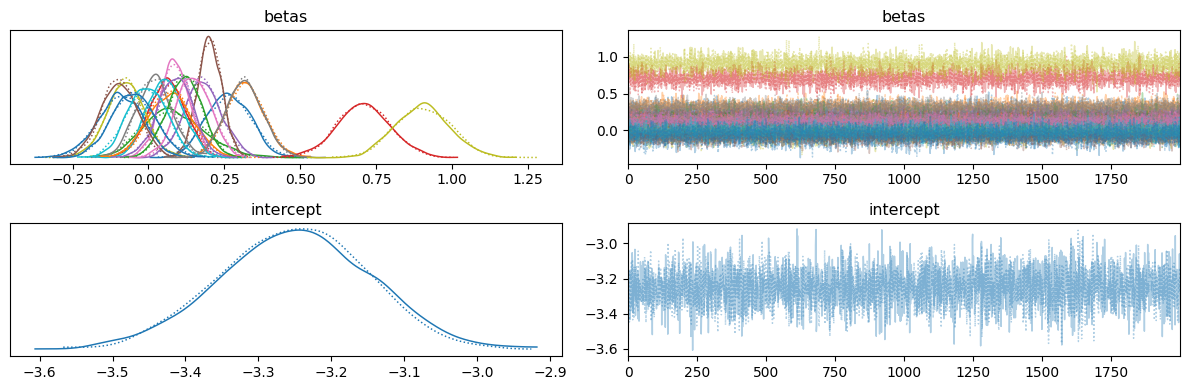

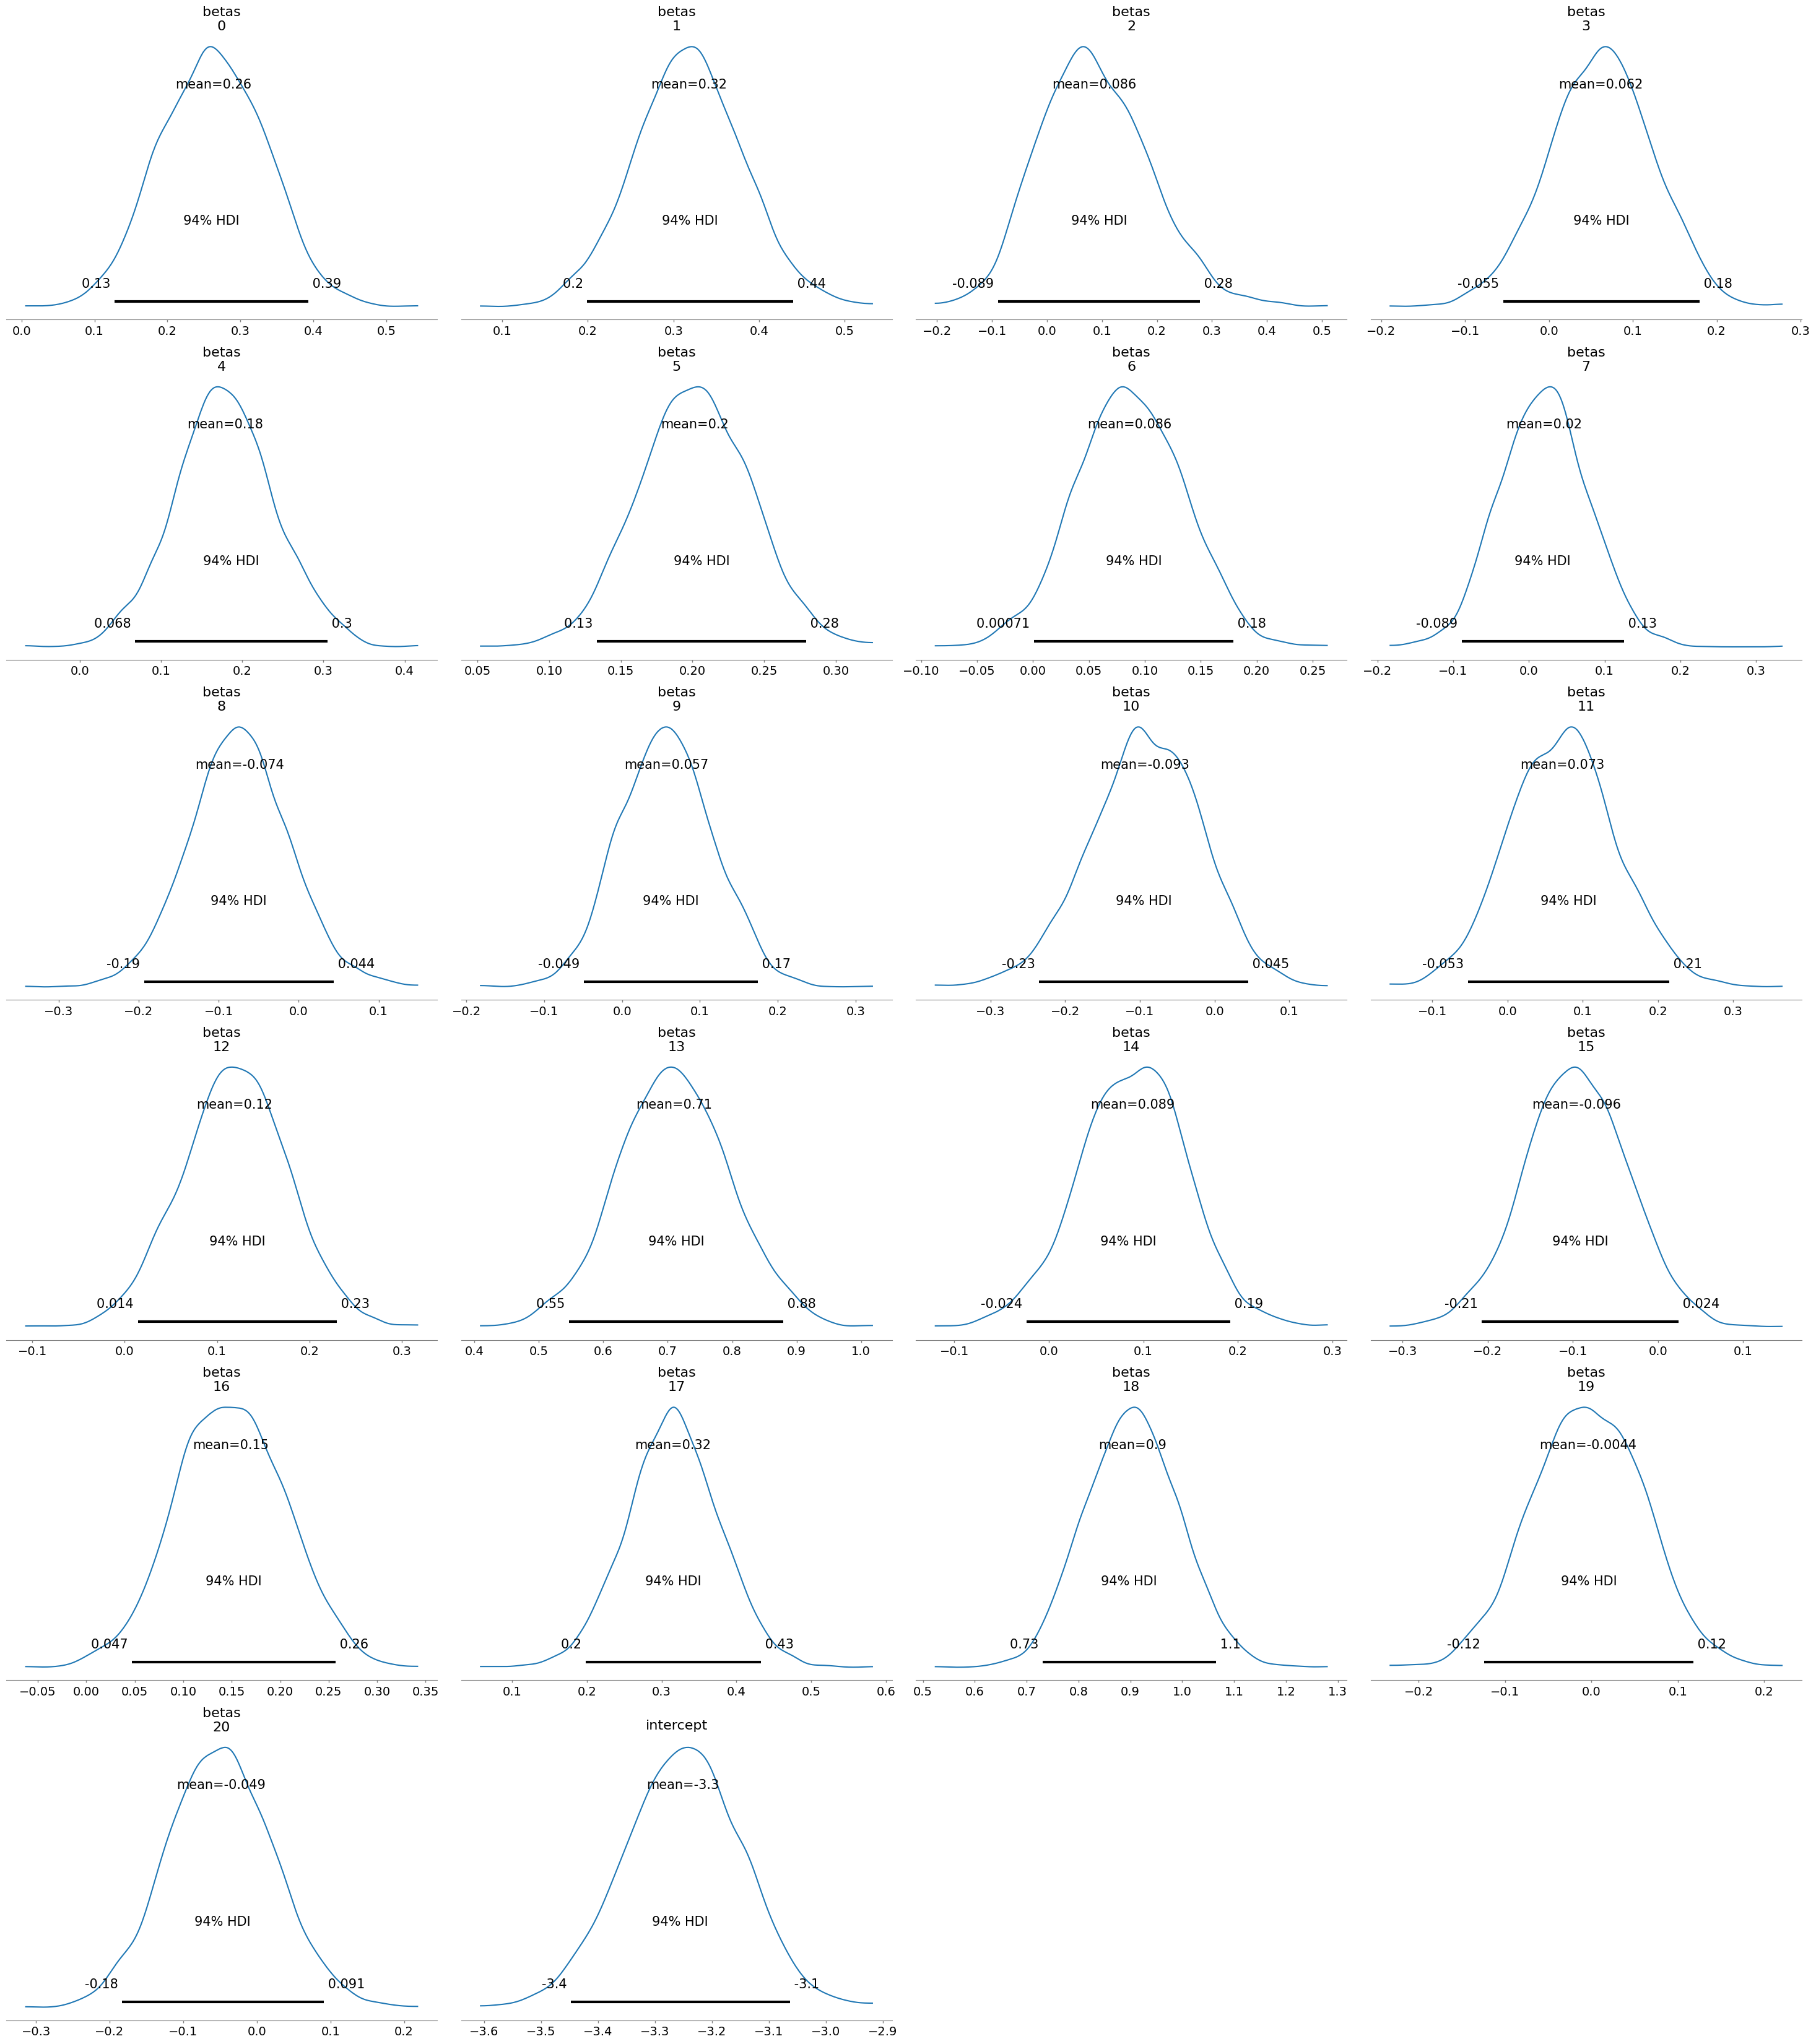

betas HDI:
[[ 1.27321871e-01  3.93203430e-01]
 [ 1.99178832e-01  4.39675210e-01]
 [-8.87780063e-02  2.78277785e-01]
 [-5.45760931e-02  1.79910633e-01]
 [ 6.78813225e-02  3.04768056e-01]
 [ 1.33283798e-01  2.79344110e-01]
 [ 7.12552130e-04  1.79198989e-01]
 [-8.88656651e-02  1.25275164e-01]
 [-1.92924366e-01  4.35133165e-02]
 [-4.92238383e-02  1.74663519e-01]
 [-2.34929674e-01  4.45774506e-02]
 [-5.27501291e-02  2.14937367e-01]
 [ 1.41890882e-02  2.29632299e-01]
 [ 5.46682699e-01  8.78952683e-01]
 [-2.36898422e-02  1.91935962e-01]
 [-2.07059936e-01  2.43687872e-02]
 [ 4.70151158e-02  2.57218269e-01]
 [ 1.98425926e-01  4.32543806e-01]
 [ 7.30341039e-01  1.06491993e+00]
 [-1.24249352e-01  1.18385067e-01]
 [-1.83225595e-01  9.06880543e-02]]

intercept HDI:
[-3.44780081 -3.0631434 ]



/usr/local/lib/python3.11/dist-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (42) in plot_autocorr, generating only 40 plots
  warnings.warn(


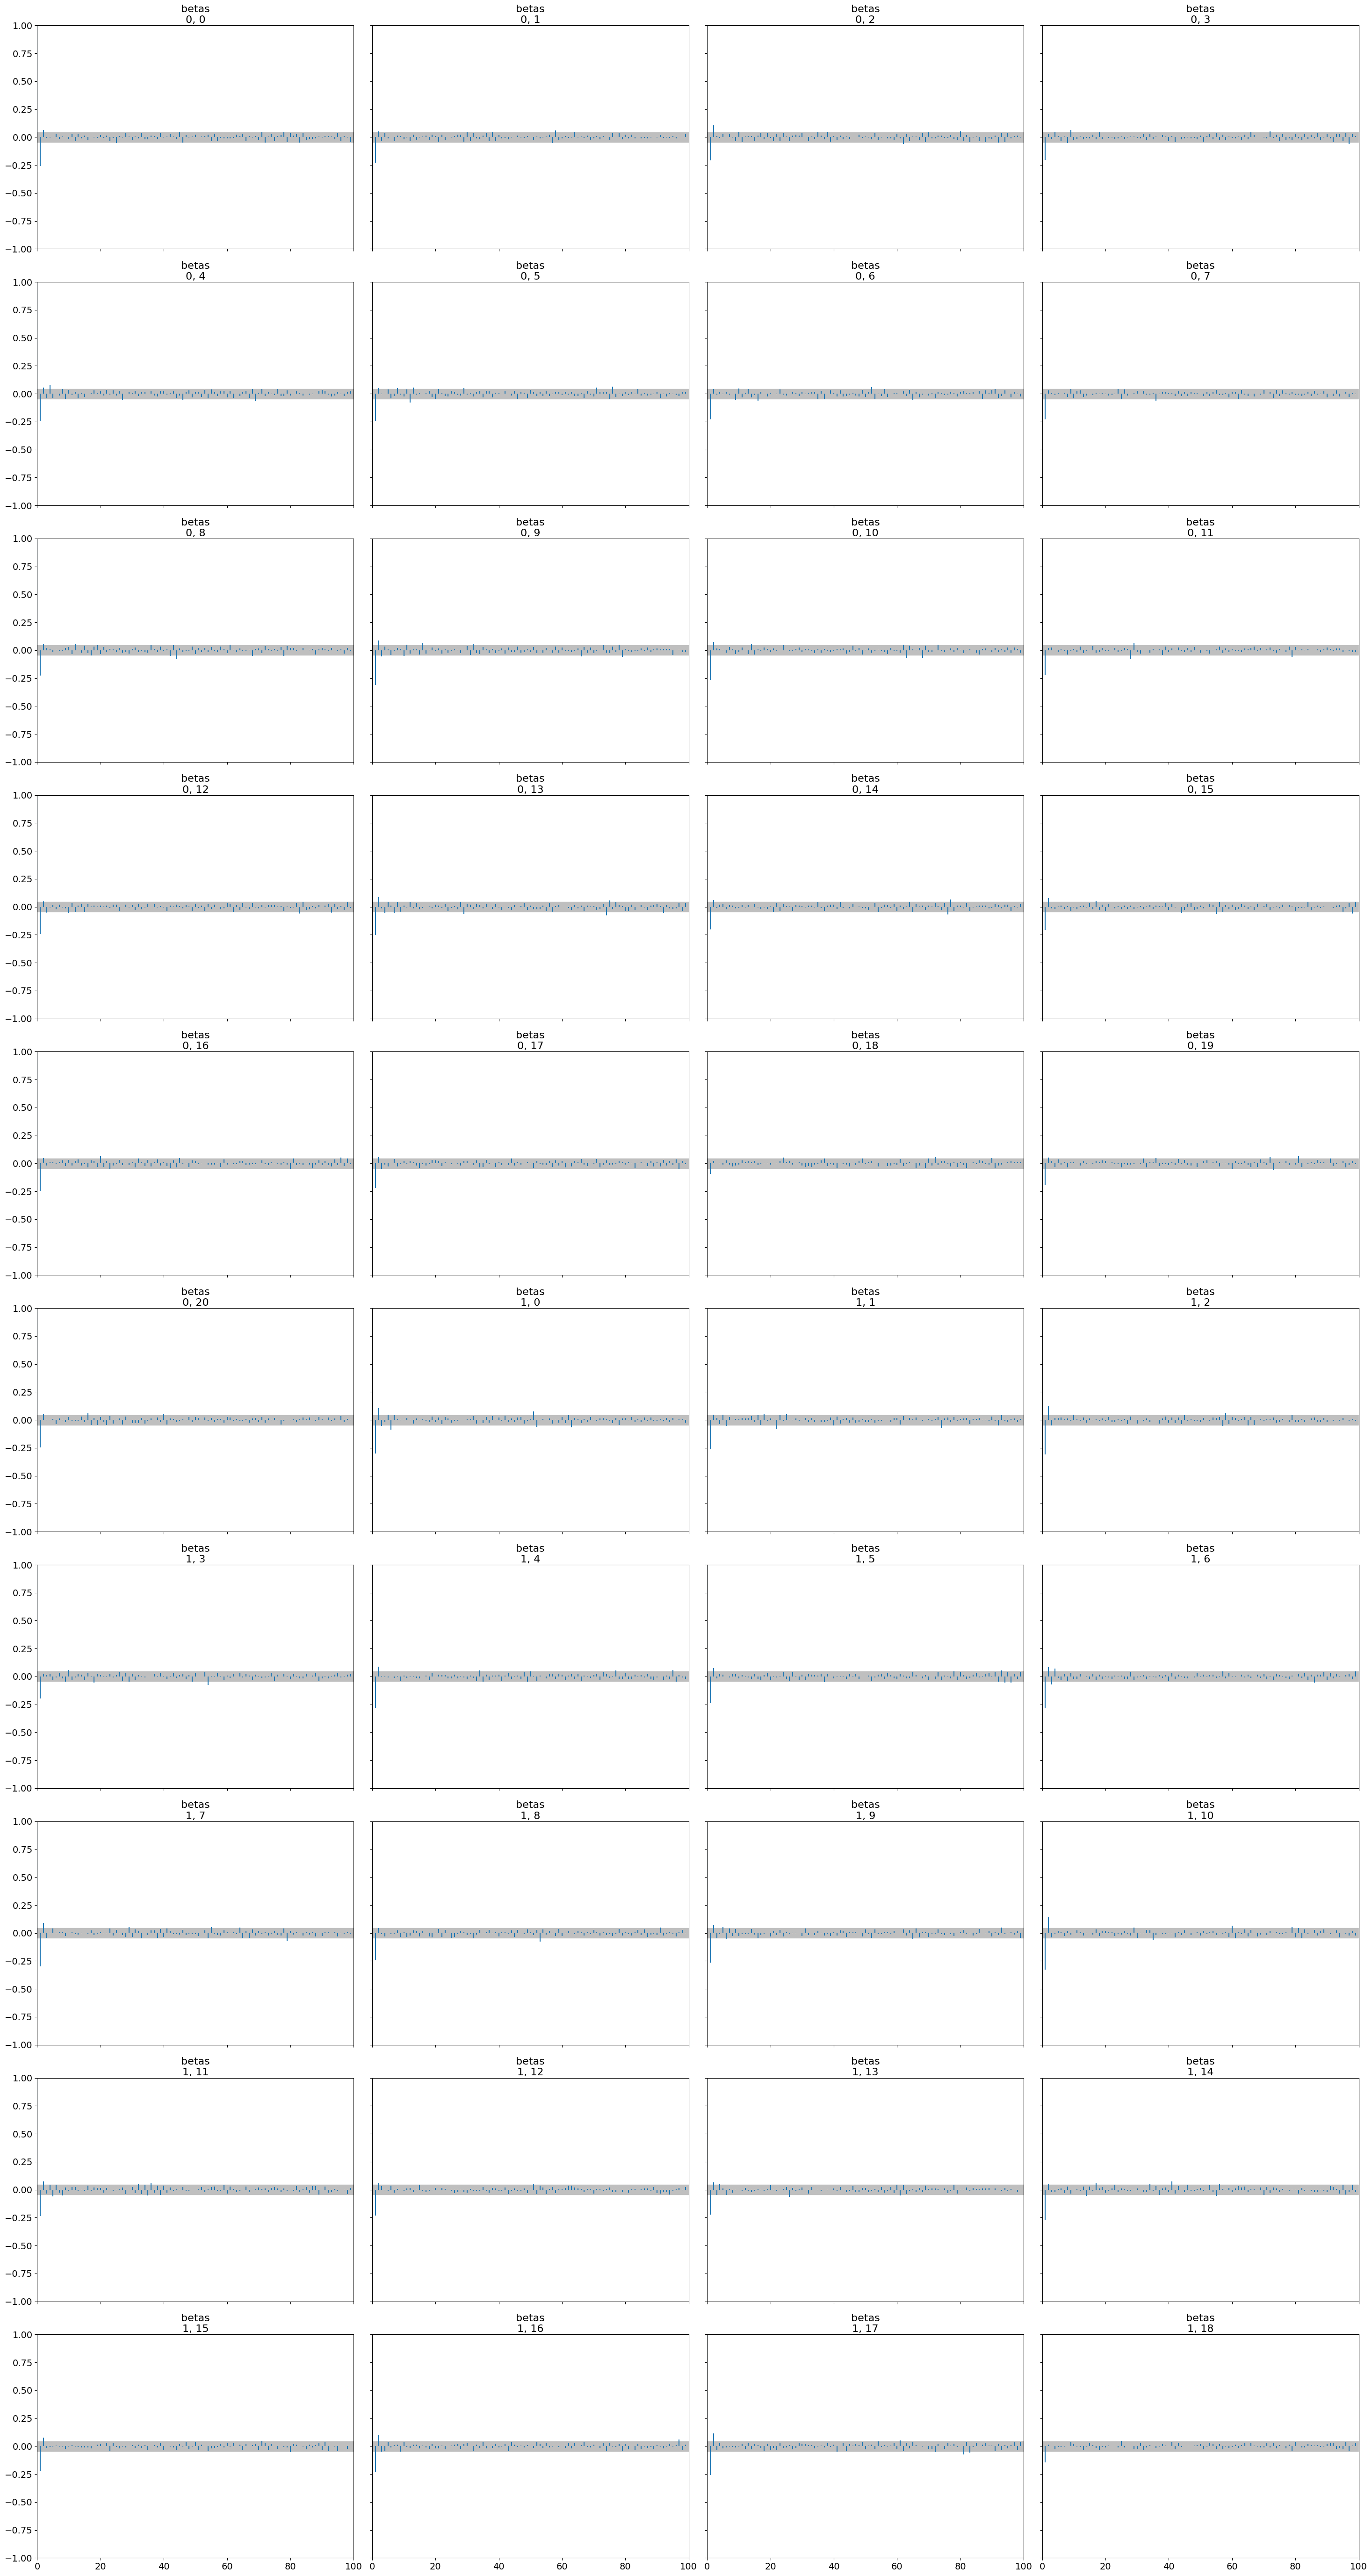

R-hat values:
<xarray.Dataset> Size: 344B
Dimensions:      (betas_dim_0: 21)
Coordinates:
  * betas_dim_0  (betas_dim_0) int64 168B 0 1 2 3 4 5 6 ... 14 15 16 17 18 19 20
Data variables:
    betas        (betas_dim_0) float64 168B 1.0 0.9998 0.9997 ... 1.001 1.0
    intercept    float64 8B 1.001


In [10]:
#Question 1 - Use Heart Disease Health Indicators Dataset (Only sample 5000 observations)

import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load Dataset
data_path = "/root/.cache/kagglehub/datasets/alexteboul/heart-disease-health-indicators-dataset/versions/3/heart_disease_health_indicators_BRFSS2015.csv"
df = pd.read_csv(data_path)

# Use a random subset of 5000 samples
df_sample = df.sample(n=5000, random_state=42)

# Define features and target
target = 'HeartDiseaseorAttack'
features = [col for col in df_sample.columns if col != target]

X = df_sample[features].values
y = df_sample[target].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Bayesian Logistic Regression Model
with pm.Model() as logistic_model:
    p = X_train.shape[1]

    # Priors
    betas = pm.Normal('betas', mu=0, sigma=1, shape=p)
    intercept = pm.Normal('intercept', mu=0, sigma=1)

    # Logit link
    logit_p = intercept + pm.math.dot(X_train, betas)
    p_disease = pm.math.sigmoid(logit_p)

    # Likelihood
    y_obs = pm.Bernoulli('y_obs', p=p_disease, observed=y_train)

    # MCMC Inference
    trace = pm.sample(2000, tune=1000, return_inferencedata=True, target_accept=0.9)

# Posterior Trace
az.plot_trace(trace)
plt.tight_layout()
plt.show()

# Posterior Distributions
az.plot_posterior(trace)
plt.tight_layout()
plt.show()

# 94% HDI (Credible Intervals)
hdi_credible_intervals = az.hdi(trace, hdi_prob=0.94)
for param, hdi_values in hdi_credible_intervals.items():
    print(f"{param} HDI:\n{hdi_values.values}\n")

# Autocorrelation Plot
az.plot_autocorr(trace, var_names=['betas'])
plt.tight_layout()
plt.show()

# R-hat diagnostic
print("R-hat values:")
print(az.rhat(trace))


### Q2: perform Bayesian Multivariate Regression

- For a data set for which modeling multiple continuous outcomes might be interesting (perhaps from kaggle.com?)
- Use `pm.Normal('betas', mu=0, sigma=1, shape=(p,m))` rather than a `pm.MvNormal` alternative
- Use `y = pm.MvNormal('y', mu=X@betas, chol=L, observed=x)` for `(n,m)` shaped `y` and `(n,p)` shaped `X`
- Downsample your dataset to tentatively explore the effect of different values of `n`,`m`,`p` and
    - report on your findings and based on that
    - choose a "reasonably small" sized data set to perform an actual analysis
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

In [30]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("mattop/super-bowl-television-ratings")
print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/mattop/super-bowl-television-ratings/versions/1


Output()

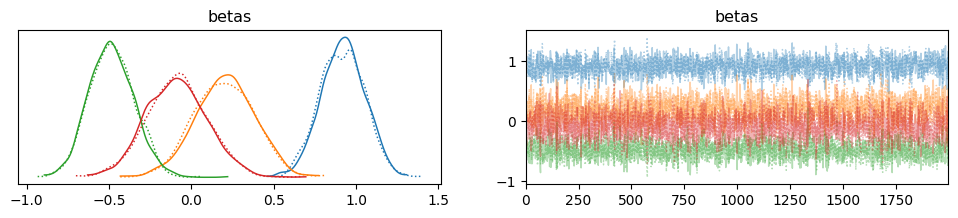

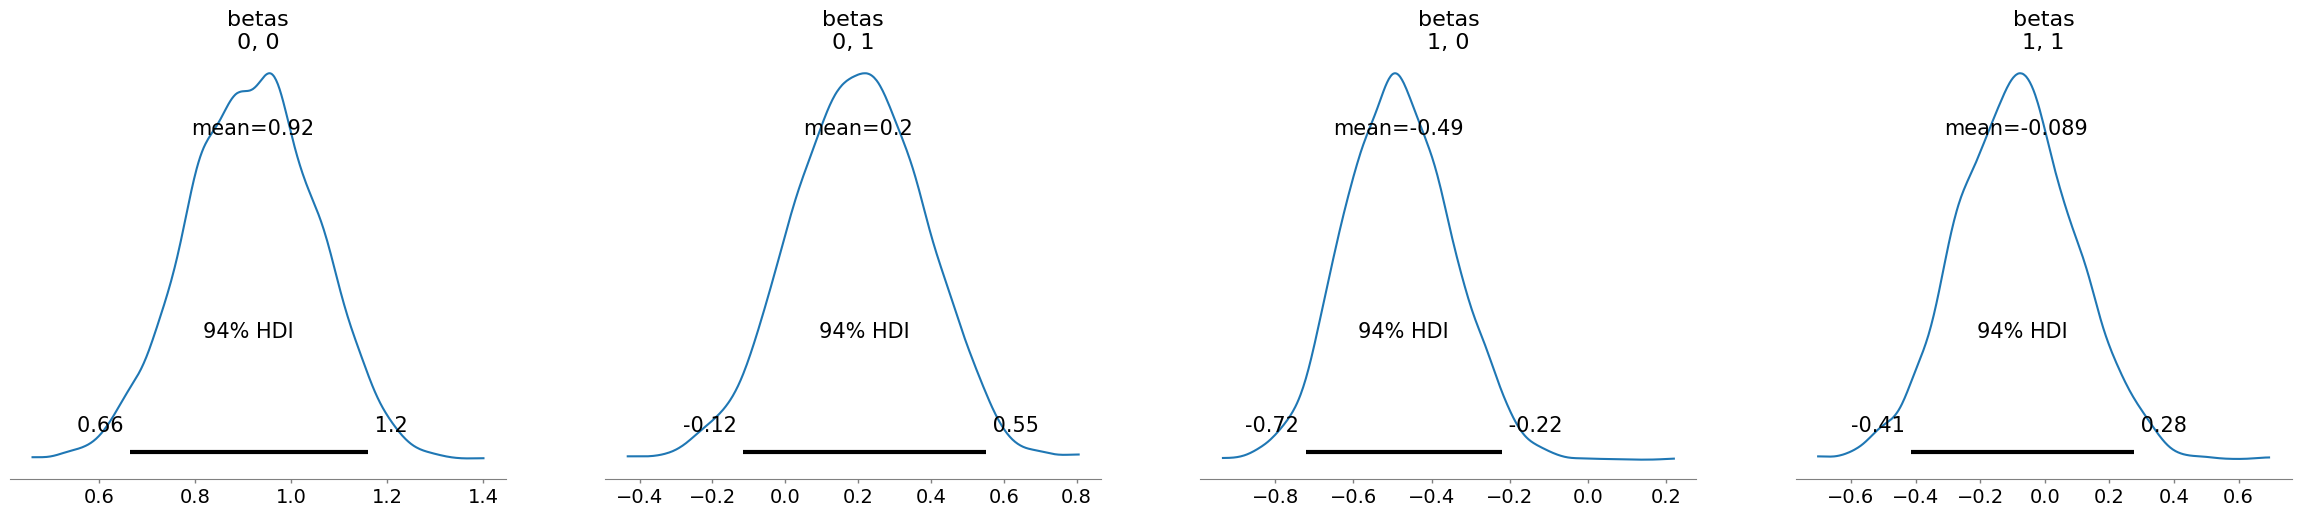

Sigma HDI: [[[0.32824576 0.7336369 ]
  [0.40736086 0.93137862]]

 [[0.40736086 0.93137862]
  [0.62389484 1.35971165]]]
betas HDI: [[[ 0.66337227  1.15859075]
  [-0.11552736  0.55117594]]

 [[-0.72220038 -0.22036155]
  [-0.41372481  0.27651684]]]
packed_L HDI: [[0.59301308 0.87180177]
 [0.70719203 1.11169501]
 [0.29334487 0.44983397]]


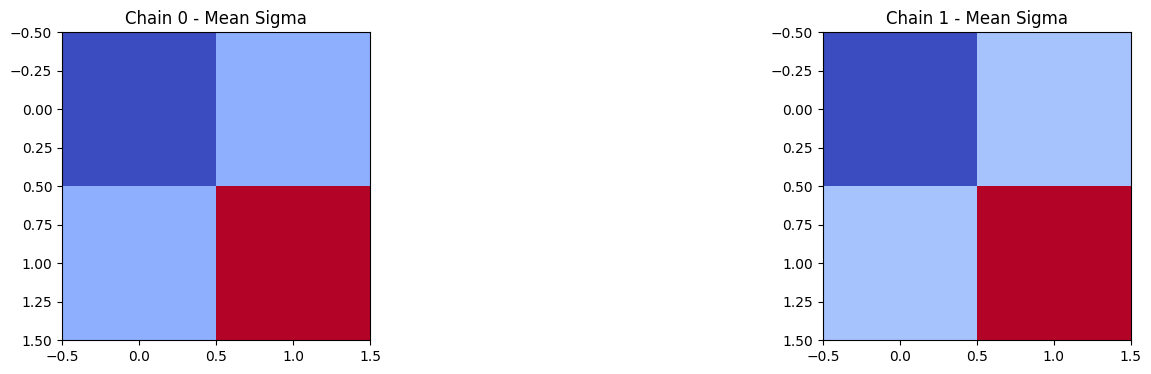

In [33]:
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and preprocess the data
data_path = "/root/.cache/kagglehub/datasets/mattop/super-bowl-television-ratings/versions/1/super-bowl-ratings.csv"
data = pd.read_csv(data_path)

# Select outcome and predictor columns
y_cols = ["average_viewers", "cost_of_30_second_ad_usd"]
x_cols = ["household_rating", "household_share"]

# Drop rows with missing values
data = data.dropna(subset=y_cols + x_cols)

# Extract values
Y = data[y_cols].values
X = data[x_cols].values

# Standardize both predictors and outcomes
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X)
Y = scaler_y.fit_transform(Y)

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Dimensions
n, p = X_train.shape
m = Y_train.shape[1]

# Build the model
with pm.Model() as multivariate_regression:
    # Cholesky decomposition for covariance
    packed_L = pm.LKJCholeskyCov("packed_L", n=m, eta=2.0,
                                 sd_dist=pm.Exponential.dist(1.0, shape=m),
                                 compute_corr=False)
    L = pm.expand_packed_triangular(m, packed_L)

    # Priors
    betas = pm.Normal("betas", mu=0, sigma=1, shape=(p, m))

    # Covariance matrix
    Sigma = pm.Deterministic("Sigma", L @ L.T)

    # Likelihood
    y_obs = pm.MvNormal("y", mu=X_train @ betas, chol=L, observed=Y_train)

    # Bayesian inference
    trace = pm.sample(2000, tune=1000, target_accept=0.9, return_inferencedata=True)

# Posterior analysis
az.plot_trace(trace, var_names=['betas'])
plt.show()

az.plot_posterior(trace, var_names=['betas'])
plt.show()

# 94% HDI
hdi_credible_intervals = az.hdi(trace, hdi_prob=0.94)
for param, hdi_values in hdi_credible_intervals.items():
    print(f"{param} HDI: {hdi_values.values}")

# Plot Sigma
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
for chain in range(2):
    ax[chain].imshow(trace.posterior["Sigma"].mean(dim="chain")[chain], cmap="coolwarm")
    ax[chain].set_title(f"Chain {chain} - Mean Sigma")
plt.show()


### Q3: perform Bayesian Multivariate Classification

- For a data set for which modeling multiple binary outcomes might be interesting (perhaps from kaggle.com?)
- Use `pm.Normal('betas', mu=0, sigma=1, shape=(p,m))` rather than a `pm.MvNormal` alternative
- Use `y = pm.Bernoulli('y', p=pm.math.invprobit(X@betas), observed=x)` for `(n,m)` shaped `y` and `(n,p)` shaped `X`
- Use latent `z = pm.MvNormal('z', mu=X@betas, chol=L)` as discussed in the "Generalized Linear Models (GLM)" section of the previous weeks lecture notes

> This provides normally distributed latent variables connected to the observed binary outcomes on which a latent covariance dependency structure may be modelled and estimated on the basis of imputing the unobserved latent variables based on their connection with the observed binary outcome variables.

- Downsample your dataset to tentatively explore the effect of different values of `n`,`m`,`p` and
    - report on your findings and based on that
    - choose a "reasonably small" sized data set to perform an actual analysis
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics


In [34]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shariful07/student-mental-health")

print("Path to dataset files:", path)

100%|██████████| 1.62k/1.62k [00:00<00:00, 3.06MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shariful07/student-mental-health/versions/3


Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


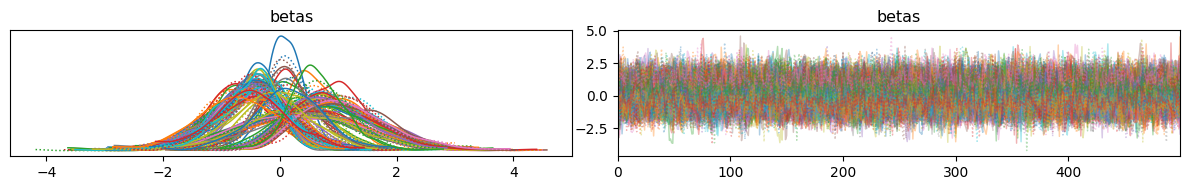

/usr/local/lib/python3.11/dist-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (144) in plot_posterior, generating only 40 plots
  warnings.warn(


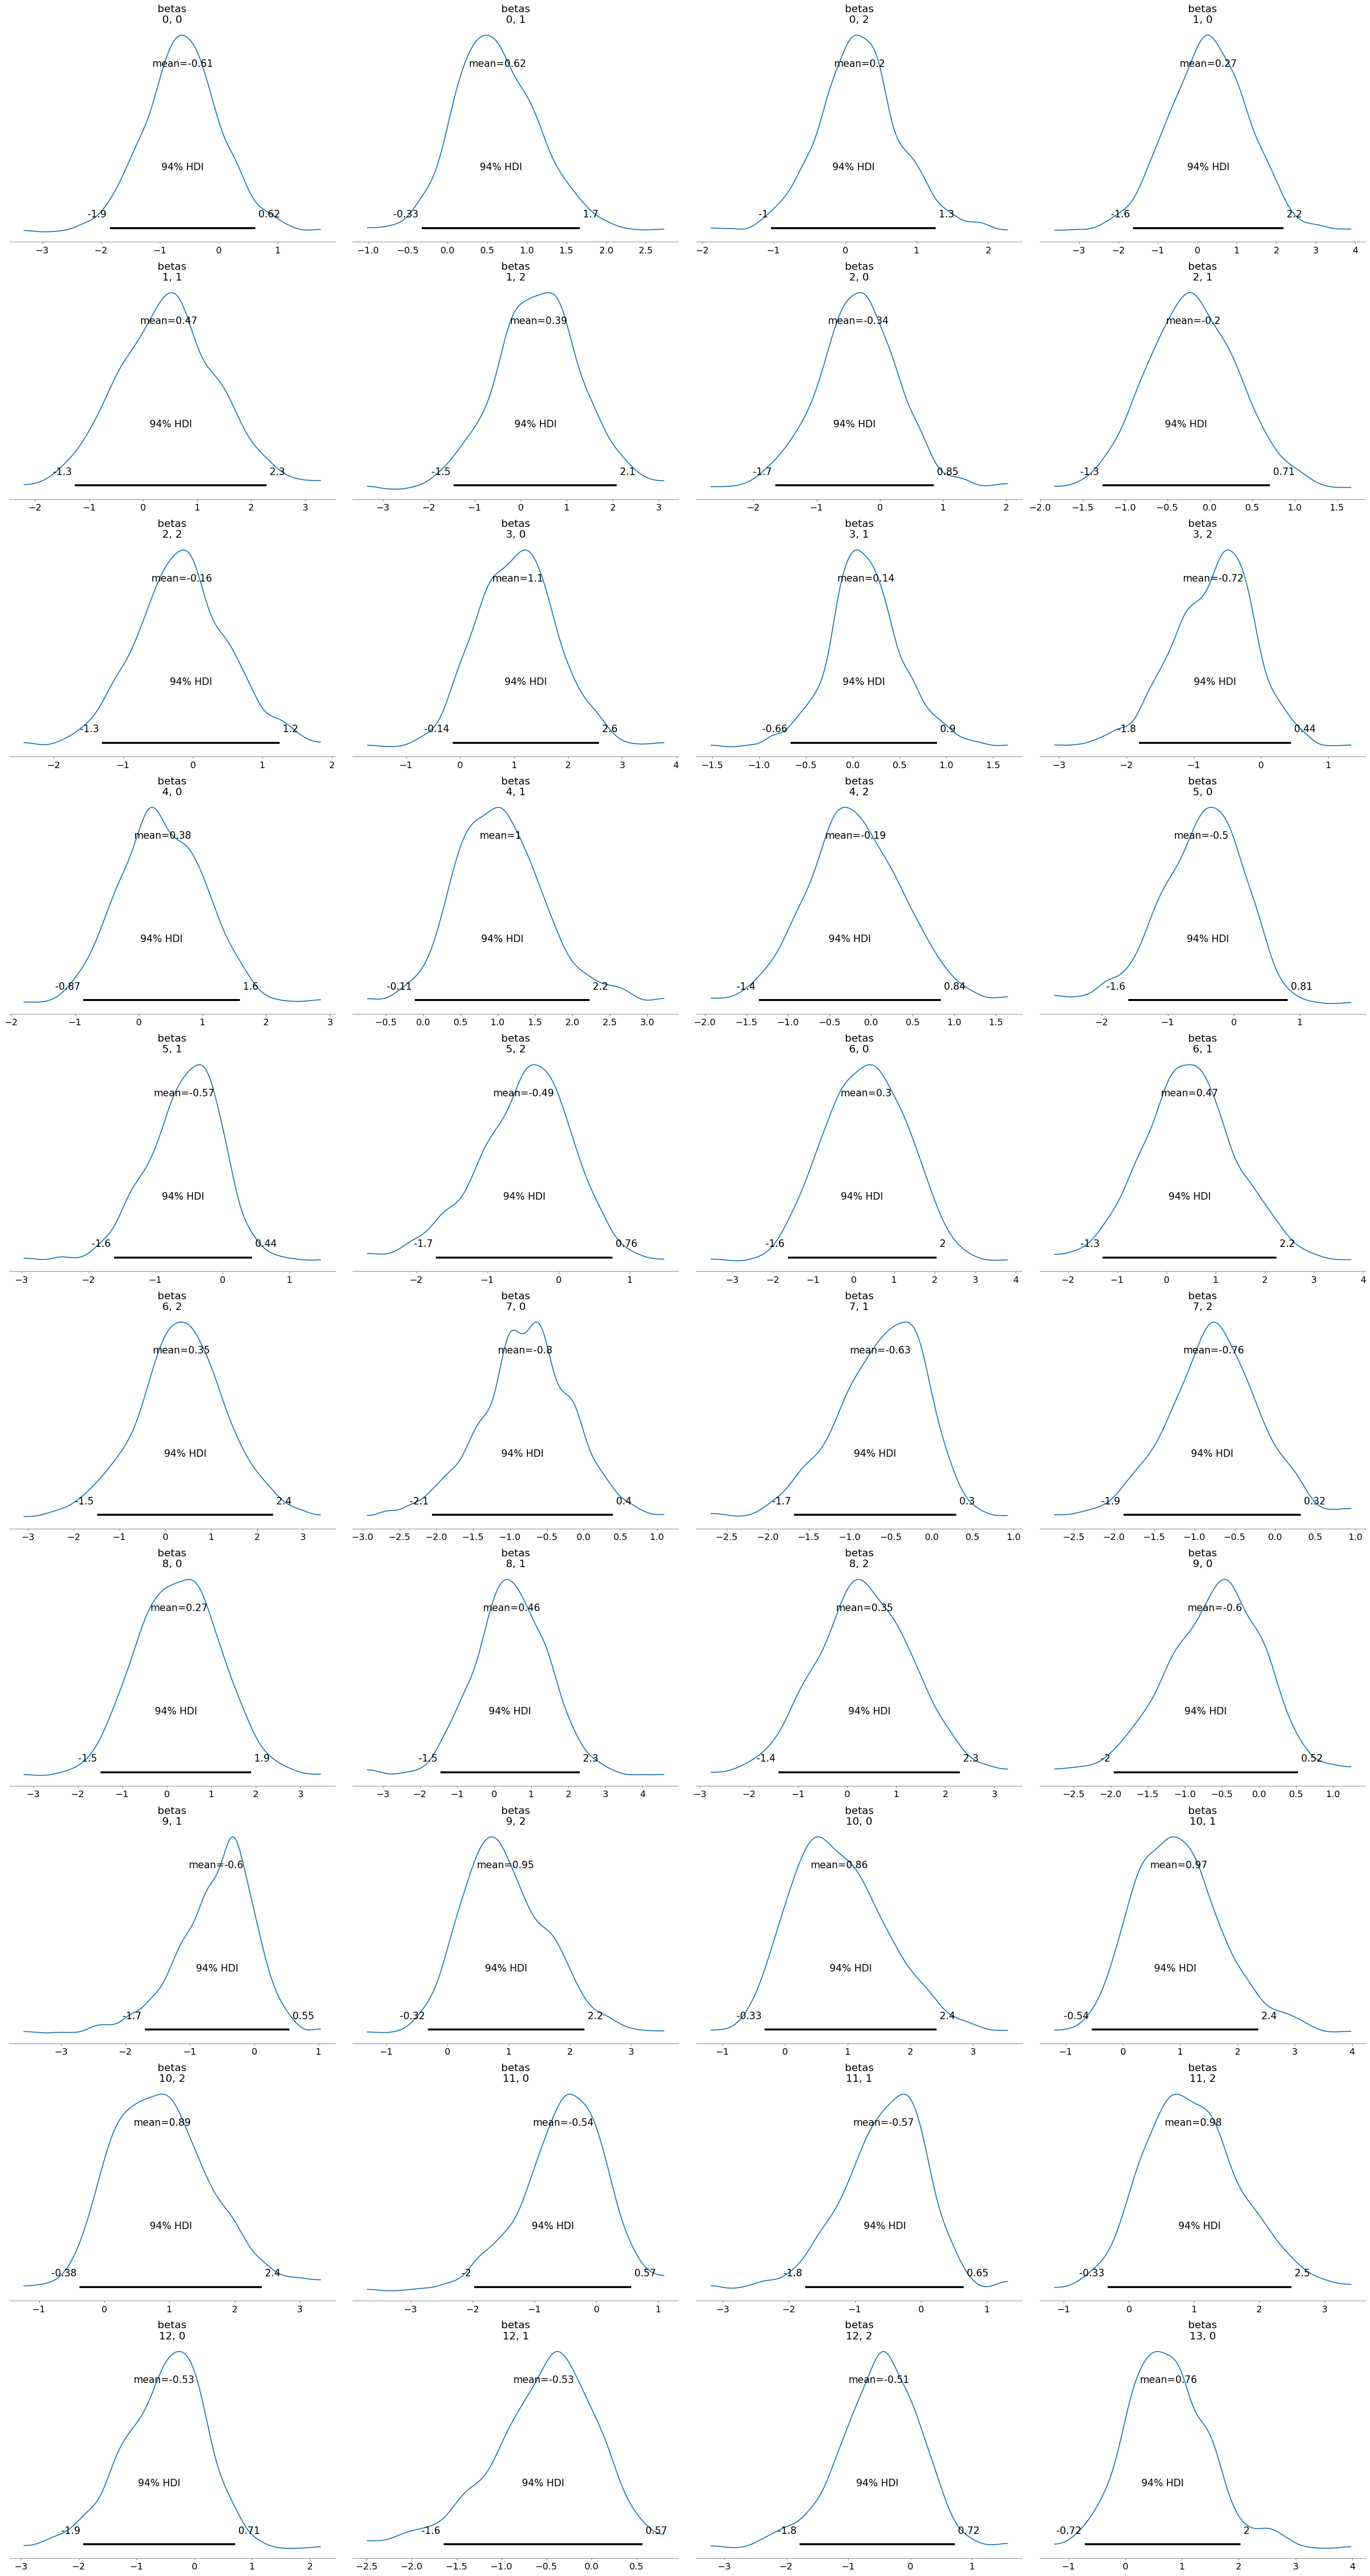

betas HDI: [[[-1.85526945  0.61916147]
  [-0.32730636  1.66706981]
  [-1.03869807  1.26410175]]

 [[-1.62736241  2.18618262]
  [-1.26641852  2.2851491 ]
  [-1.46248045  2.09196114]]

 [[-1.65858124  0.85137391]
  [-1.26789712  0.70753878]
  [-1.30525139  1.24682663]]

 [[-0.14301522  2.57531542]
  [-0.66199258  0.89968811]
  [-1.80952429  0.44161341]]

 [[-0.87096012  1.58572555]
  [-0.11254454  2.22913899]
  [-1.35295202  0.83729494]]

 [[-1.59945669  0.81139193]
  [-1.62001011  0.44482774]
  [-1.72495091  0.76071087]]

 [[-1.63371103  2.04596742]
  [-1.30257919  2.23596939]
  [-1.49255108  2.35679548]]

 [[-2.06286457  0.39982284]
  [-1.68482791  0.29888688]
  [-1.88478539  0.31822457]]

 [[-1.49408079  1.89769338]
  [-1.45548065  2.30031024]
  [-1.39767041  2.30237387]]

 [[-1.96178075  0.52416778]
  [-1.70352653  0.55080225]
  [-0.32101364  2.24108092]]

 [[-0.32726947  2.41435762]
  [-0.5406312   2.36412237]
  [-0.37973931  2.41957887]]

 [[-1.97483963  0.5655909 ]
  [-1.7528956  

In [48]:
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Load data
path = "/root/.cache/kagglehub/datasets/shariful07/student-mental-health/versions/3/Student Mental health.csv"
data = pd.read_csv(path)

# Rename columns for ease of access
data.columns = [
    "Timestamp", "Gender", "Age", "Course", "Year",
    "CGPA", "Marital_Status", "Depression", "Anxiety",
    "Panic_Attacks", "Sought_Treatment"
]

# Binary outcome columns
y_cols = ["Depression", "Anxiety", "Panic_Attacks"]
for col in y_cols:
    data[col] = data[col].str.strip().str.lower().map({"yes": 1, "no": 0})

# Convert CGPA range to numeric midpoint
cgpa_map = {
    "0.00 - 1.00": 0.5,
    "1.00 - 2.00": 1.5,
    "2.00 - 2.49": 2.25,
    "2.50 - 2.99": 2.75,
    "3.00 - 3.49": 3.25,
    "3.50 - 4.00": 3.75
}
data["CGPA"] = data["CGPA"].map(cgpa_map)

# Cast Age to numeric
data["Age"] = pd.to_numeric(data["Age"], errors="coerce")

# Define features
categorical_features = ["Gender", "Course"]
numerical_features = ["Age", "CGPA"]

# Drop missing data
data = data.dropna(subset=y_cols + categorical_features + numerical_features)

# Optional: downsample for faster inference
data = data.sample(n=min(150, len(data)), random_state=42).reset_index(drop=True)

# One-hot encode categorical features
encoder = OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False)
X_categorical = encoder.fit_transform(data[categorical_features])

# Combine features
X_numerical = data[numerical_features].values
X = np.hstack((X_categorical, X_numerical))
Y = data[y_cols].values.astype(int)

# Sanity check for target
assert np.all(np.isin(Y, [0, 1])), "Y contains non-binary values!"

# Standardize X
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Get shapes
n, p = X_train.shape
m = Y_train.shape[1]

# Build PyMC model
with pm.Model() as multivariate_classification:
    # Latent covariance structure
    packed_L = pm.LKJCholeskyCov("packed_L", n=m, eta=2.0,
                                 sd_dist=pm.Exponential.dist(1.0, shape=m),
                                 compute_corr=False)
    L = pm.expand_packed_triangular(m, packed_L)

    # Coefficient priors
    betas = pm.Normal("betas", mu=0, sigma=1, shape=(p, m))

    # Latent linear predictor
    z = pm.MvNormal("z", mu=X_train @ betas, chol=L, shape=(n, m))

    # Apply inverse probit and clip to avoid 0/1 edge cases
    eps = 1e-6
    probs = pm.math.clip(pm.math.invprobit(z), eps, 1 - eps)

    # Bernoulli likelihood
    y_obs = pm.Bernoulli("y", p=probs, observed=Y_train)

    # MCMC sampling
    trace = pm.sample(500, tune=500, target_accept=0.95, chains=2, cores=1, return_inferencedata=True)

# Plot trace and posterior
az.plot_trace(trace, var_names=['betas'])
plt.tight_layout()
plt.show()

az.plot_posterior(trace, var_names=['betas'])
plt.tight_layout()
plt.show()

# 94% HDI summary
hdi_credible_intervals = az.hdi(trace, hdi_prob=0.94)
for param, hdi_values in hdi_credible_intervals.items():
    print(f"{param} HDI: {hdi_values.values}")

References: OpenAI to generate some sections of code